# Computação quântica com Qiskit

Os bits quânticos (qubits) são a unidade de informação fundamental para computadores quânticos, tal como os bits para computadores clássicos. No entanto, diferentemente dos bits, o qubit não assume somente os valores 1 ou 0, mas uma combinação deles.

Pode-se considerar, então, uma base $\{ | 0 \rangle, | 1 \rangle \} $, tal que:

$$
| 0 \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}
$$
$$
| 1 \rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

Assim, o qubit é definido como:

$$
|\psi \rangle = \alpha | 0 \rangle + \beta | 1 \rangle
$$

Onde $|\alpha|^2 + |\beta|^2 = 1$ e, após executar uma medição em $|\psi \rangle$:

- $|\alpha|^2$ é probabilidade de obter $|0 \rangle$
- $|\beta|^2$ é probabilidade de obter $|1 \rangle$

In [1]:
from qiskit import *
import numpy as np
import matplotlib.pyplot as plt
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector

## 1. Gerando o Circuito Quântico

Aqui os qubits representam os estados quânticos do sistema e os bits são necessários para armazenar as medidas realizadas nos qubits.

In [2]:
q = QuantumRegister(2, 'q') #bits quânticos (qubits)
b = ClassicalRegister(2, 'b') #bits clássicos

In [3]:
circuit = QuantumCircuit(q,b) #circuito

In [4]:
alpha = 1/np.sqrt(2) #constante alpha
beta = 1/np.sqrt(2) #constante beta
psi = [alpha, beta] #estado
circuit.initialize(psi, q[0]) #inicializando circuito

## 2. Esfera de Bloch

A esfera de Bloch serve como uma representação para os qubits, tal que:

$$
|\psi \rangle = cos \frac{\theta}{2} | 0 \rangle + e^{i\phi} sen \frac{\theta}{2} | 1 \rangle
$$

o par $\{ \theta, \phi \}$ é um ponto na esfera.

### 2.1 Direto

theta:  90
phi:  90


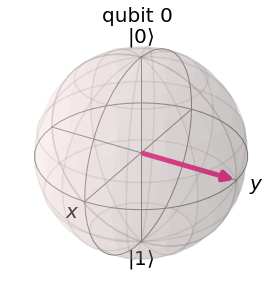

In [5]:
theta = float(input('theta: ')) #ângulo theta em graus
phi = float(input('phi: ')) #ângulo phi em graus
theta = theta*np.pi/180 #passando para radianos
phi = phi*np.pi/180

#constantes que multiplicam os estados
alpha = np.cos(theta/2) 
beta = np.exp(1j*phi)*np.sin(theta/2)
estado_inicial = [alpha, beta]

#gerando circuito de 1 qubit
q = QuantumRegister(1, 'q')
circuito = QuantumCircuit(q)
circuito.initialize(estado_inicial, q[0]) #inicializando o qubit

#obtendo o vetor de estado na esfera de Bloch
processo = Aer.get_backend('statevector_simulator')
vetor = execute(circuito, backend=processo).result().get_statevector()

plot_bloch_multivector(vetor)

### 2.2 Função

In [6]:
def Bloch(theta, phi):
    theta = theta*np.pi/180
    phi = phi*np.pi/180

    alpha = np.cos(theta/2)
    beta = np.exp(1j*phi)*np.sin(theta/2)
    estado_inicial = [alpha, beta]

    q = QuantumRegister(1, 'q')
    circuito = QuantumCircuit(q)
    circuito.initialize(estado_inicial, q[0])

    processo = Aer.get_backend('statevector_simulator')
    vetor = execute(circuito, backend=processo).result().get_statevector()

    return plot_bloch_multivector(vetor)

#### Testando para diferentes $(\theta, \phi)$

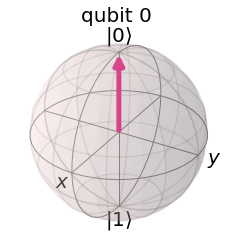

In [7]:
Bloch(0,0)

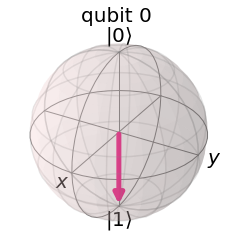

In [8]:
Bloch(180,0)

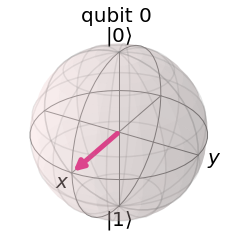

In [9]:
Bloch(90,0)

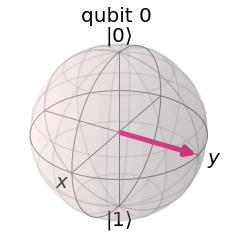

In [10]:
Bloch(90,90)

## 3. Portas Quânticas

As portas quânticas normalmente são representadas por matrizes unitárias (operadores) $U$ tal que $U^{\dagger}U = I$.

### 3.1 Portas quânticas de um qubit
As mais comuns são as X (NOT), Y e Z (matrizes de Pauli) e a porta Hadamard (H):

$$X = \begin{bmatrix}  0 & 1 \\ 1 & 0 \end{bmatrix} ; Y = \begin{bmatrix}  0 & -i \\ i & 0 \end{bmatrix}$$


$$Z = \begin{bmatrix}  1 & 0 \\ 0 & -1 \end{bmatrix} ; H = \frac{1}{\sqrt{2}}\begin{bmatrix}  0 & 1 \\ 1 & 0 \end{bmatrix} $$


- Operações com as matrizes de Pauli:

$$
X|\psi \rangle = \alpha | 1 \rangle + \beta | 0 \rangle
$$
$$
Y|\psi \rangle = i \alpha | 1 \rangle - i\beta | 0 \rangle
$$
$$
Z|\psi \rangle = \alpha | 0 \rangle - \beta | 1 \rangle
$$

A matriz X age trocando os estados: $X| 0 \rangle = | 1 \rangle$ e $X| 1 \rangle = | 0 \rangle$ .

A matriz Y age trocando os estados: $Y| 0 \rangle = i| 1 \rangle$ e $X| 1 \rangle = - i| 0 \rangle$ .

A matriz Z age trocando os estados: $Z| 0 \rangle = | 0 \rangle$ e $X| 1 \rangle = -| 1 \rangle$ .

- Operações com a porta Hadamard:

$$
H = \frac{1}{\sqrt{2}} (X + Z)
$$

$$
H|0 \rangle = \frac{1}{\sqrt{2}} (X| 0 \rangle + Z | 0 \rangle) = \frac{1}{\sqrt{2}} (| 0 \rangle + | 1 \rangle) = | + \rangle
$$

$$
H|1 \rangle = \frac{1}{\sqrt{2}} (X| 1 \rangle + Z | 1 \rangle) = \frac{1}{\sqrt{2}} (| 0 \rangle - | 1 \rangle) = | - \rangle
$$

A porta Hadamard age criando uma superposição entre os estados (igualmente prováveis!).

OBS: $X = HZH$ e $Z = HXH$.

In [11]:
def X(alpha,beta):
    q = QuantumRegister(1, 'q')
    circuito = QuantumCircuit(q)
    estado_inicial = [alpha,beta]
    circuito.initialize(estado_inicial,q)
    circuito.x(q) #aplicando X
    
    #verificando o vetor na esfera de Bloch
    processo = Aer.get_backend('statevector_simulator')
    vetor = execute(circuito, backend=processo).result().get_statevector()

    return plot_bloch_multivector(vetor)


def Y(alpha,beta):
    q = QuantumRegister(1, 'q')
    circuito = QuantumCircuit(q)
    estado_inicial = [alpha,beta]
    circuito.initialize(estado_inicial,q)
    circuito.y(q) #aplicando Y
    
    #verificando o vetor na esfera de Bloch
    processo = Aer.get_backend('statevector_simulator')
    vetor = execute(circuito, backend=processo).result().get_statevector()

    return plot_bloch_multivector(vetor)


def Z(alpha,beta):
    q = QuantumRegister(1, 'q')
    circuito = QuantumCircuit(q)
    estado_inicial = [alpha,beta]
    circuito.initialize(estado_inicial,q)
    circuito.z(q) #aplicando Z
    
    #verificando o vetor na esfera de Bloch
    processo = Aer.get_backend('statevector_simulator')
    vetor = execute(circuito, backend=processo).result().get_statevector()

    return plot_bloch_multivector(vetor)


def H(alpha,beta):
    q = QuantumRegister(1, 'q')
    circuito = QuantumCircuit(q)
    estado_inicial = [alpha,beta]
    circuito.initialize(estado_inicial,q)
    circuito.h(q) #aplicando H
    
    #verificando o vetor na esfera de Bloch
    processo = Aer.get_backend('statevector_simulator')
    vetor = execute(circuito, backend=processo).result().get_statevector()

    return plot_bloch_multivector(vetor)

#### X (NOT), Y e Z -- Matrizes de Pauli

Serão verificadas a aplicação destas portas em $| 0 \rangle$ e $| 1 \rangle$ :

- $| 0 \rangle$ é obtido para $\alpha = 1$ e $\beta = 0$
- $| 1 \rangle$ é obtido para $\alpha = 0$ e $\beta = 1$

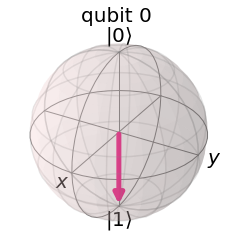

In [12]:
X(1,0)

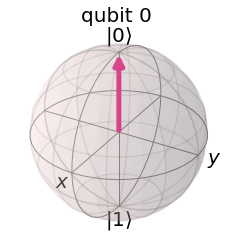

In [13]:
X(0,1)

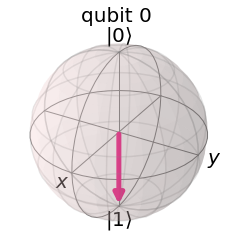

In [14]:
Y(1,0)

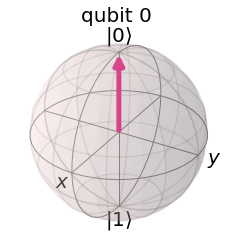

In [15]:
Y(0,1)

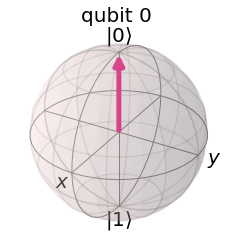

In [16]:
Z(1,0)

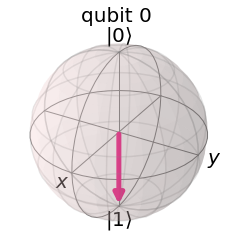

In [17]:
Z(0,1)

#### Hadamard (H)

Aplicação da porta Hadamard em $| 0 \rangle$ e em $| 1 \rangle$.

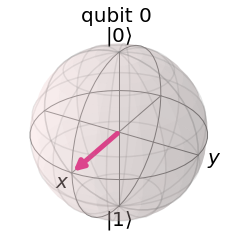

In [18]:
H(1,0)

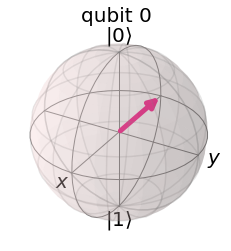

In [19]:
H(0,1)

### 3.2 Desenhando os circuitos

É possível verificar os circuitos com as portas sendo aplicadas nos qubits:

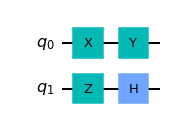

In [20]:
q = QuantumRegister(2, 'q')
circuito = QuantumCircuit(q)
circuito.x(q[0])
circuito.y(q[0])
circuito.z(q[1])
circuito.h(q[1])


circuito.draw('mpl')

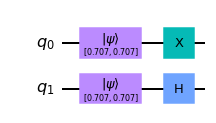

In [21]:
q = QuantumRegister(2, 'q')
circuito = QuantumCircuit(q)
estado_inicial = [1/np.sqrt(2),1/np.sqrt(2)]
circuito.initialize(estado_inicial,q[0])
circuito.initialize(estado_inicial,q[1])
circuito.x(q[0])
circuito.h(q[1])


circuito.draw('mpl')

### 3.3 Portas de múltiplos qubits

Assim como para 1 qubit, tem-se o conjunto: $\{ | 0 \rangle, | 1 \rangle \}$ de estados , para 2 qubits: $\{ | 00 \rangle, | 01 \rangle \, | 10 \rangle, | 11 \rangle \} $

Portanto, para N-qubits existem $2^N$ estados possíveis:

$$
|\psi \rangle = c_1 | 0...00 \rangle + c_2 | 0...01 \rangle + ... + c_{2^N} | 1...11 \rangle
$$

As portas mais comuns são a CNOT (CX) e a Toffoli (CCX):

#### Porta CNOT (CX)

Trata-se de uma porta de 2 qubits (NOT controlada) e só atua quando o qubit de controle for $| 1 \rangle$, mudando o qubit alvo (target) para o outro estado (aplica X):

$$
CX| 00 \rangle = | 00 \rangle
$$
$$
CX| 01 \rangle = | 01 \rangle
$$
$$
CX| 10 \rangle = | 11 \rangle
$$
$$
CX| 11 \rangle = | 10 \rangle
$$


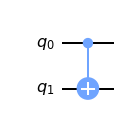

In [22]:
q = QuantumRegister(2, 'q')
circuito = QuantumCircuit(q)
circuito.cx(q[0],q[1]) #aplicando CX
circuito.draw(output = 'mpl')

#### Porta Toffoli (CCX)

Semelhante à CNOT, mas para 3 qubits. Age somente se os dois qubits de controle forem $| 1 \rangle$, aplicando X no qubit alvo, como por exemplo:

$$
CCX| 110 \rangle = | 111 \rangle
$$

$$
CCX| 111 \rangle = | 110 \rangle
$$


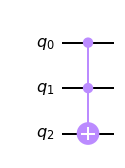

In [23]:
q = QuantumRegister(3, 'q')
circuito = QuantumCircuit(q)
circuito.ccx(q[0],q[1],q[2]) #aplicando CCX
circuito.draw(output = 'mpl')

## 4. Medidas e Probabilidades

Como visto, os bits clássicos armazenam a informação dos bits quânticos após medidas serem realizadas.

Neste exemplo, será performada a operação $H |00 \rangle$, gerando 4 estados igualmente prováveis:

$$
|\psi \rangle = \frac{1}{2} [|00 \rangle + |01 \rangle + |10 \rangle + |11 \rangle]
$$

### 4.1 Medindo com simulador

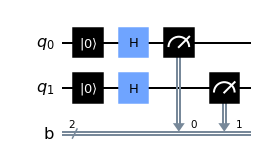

In [24]:
q = QuantumRegister(2, 'q') #Registrando os qubits

b = ClassicalRegister(2, 'b') #Registrando os Bits

circuito = QuantumCircuit(q,b) #Criando o Circuito

# Inicialização dos Estados (os dois qubits no estado |0> ):
circuito.reset(q)
# Aplicação de H:
circuito.h(q)
# Realização das Medidas
circuito.measure(q,b)
circuito.draw(output = 'mpl')

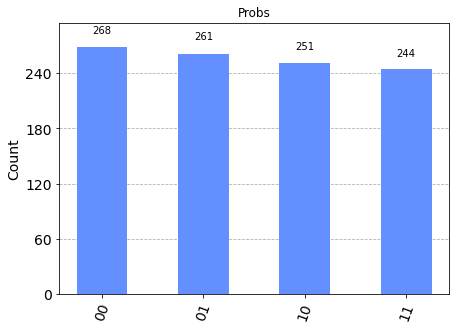

In [25]:
simular = Aer.get_backend('qasm_simulator') #simulador de computador quântico
resultado = execute(circuito, backend=simular, shots=1024).result() #resultados

#histograma com os resultados
plot_histogram(resultado.get_counts(circuito), title='Probs')

### 4.2 Medindo com computador quântico IBM

In [26]:
#IBMQ.save_account('Users_Token') -- registrando a conta
IBMQ.load_account() #carregando conta da IBM quantum experience

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [27]:
provedor = IBMQ.get_provider('ibm-q') #provedor
computador = provedor.get_backend('ibmq_quito') #escolhendo o computador quântico da IBM
executar = execute(circuito,backend=computador, shots = 8000) #executando
job_monitor(executar) #status da solicitação

Job Status: job has successfully run


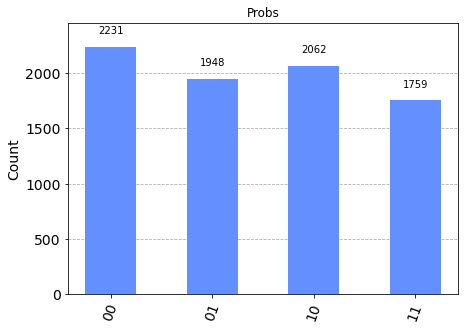

In [28]:
resultadoIBM = executar.result()
plot_histogram(resultadoIBM.get_counts(circuito), title='Probs')